## Importing necessary Libraries and Data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data_og = pd.read_csv(f'train_1.csv', encoding='latin1')
data = data_og.copy()

In [4]:
data.dropna(inplace=True)

In [5]:
data

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144944,ChichÃ©n_ItzÃ¡_es.wikipedia.org_all-access_spider,8.0,13.0,19.0,14.0,6.0,5.0,10.0,9.0,5.0,...,15.0,18.0,12.0,6.0,5.0,14.0,10.0,174.0,8.0,19.0
144945,FecundaciÃ³n_es.wikipedia.org_all-access_spider,29.0,16.0,6.0,11.0,33.0,4.0,11.0,16.0,10.0,...,8.0,8.0,13.0,3.0,6.0,10.0,16.0,10.0,7.0,8.0
144946,Gran_Hermano_VIP_(EspaÃ±a)_es.wikipedia.org_al...,4.0,25.0,7.0,11.0,6.0,6.0,16.0,11.0,23.0,...,12.0,299.0,46.0,5.0,11.0,77.0,523.0,110.0,171.0,43.0
144947,Modelo_atÃ³mico_de_Thomson_es.wikipedia.org_al...,0.0,2.0,6.0,6.0,7.0,5.0,4.0,6.0,7.0,...,13.0,1.0,5.0,11.0,9.0,11.0,6.0,7.0,9.0,4.0


## Adding New Features (to be extracted from the Page name)

In [6]:
data["channel"] = 0
data["site"] = 0
data["access_type"] = 0

In [7]:
cols = list(data.columns)
cols_new = []
cols_new = [cols[0]] + cols[-3:] + cols[1:-3]
data = data[cols_new]
data

,Page,channel,site,access_type,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,0,0,0,18.0,11.0,5.0,13.0,14.0,9.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,0,0,0,11.0,14.0,15.0,18.0,11.0,13.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,0,0,0,1.0,0.0,1.0,1.0,0.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,0,0,0,35.0,13.0,10.0,94.0,4.0,26.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
5,5566_zh.wikipedia.org_all-access_spider,0,0,0,12.0,7.0,4.0,5.0,20.0,8.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144944,ChichÃ©n_ItzÃ¡_es.wikipedia.org_all-access_spider,0,0,0,8.0,13.0,19.0,14.0,6.0,5.0,...,15.0,18.0,12.0,6.0,5.0,14.0,10.0,174.0,8.0,19.0
144945,FecundaciÃ³n_es.wikipedia.org_all-access_spider,0,0,0,29.0,16.0,6.0,11.0,33.0,4.0,...,8.0,8.0,13.0,3.0,6.0,10.0,16.0,10.0,7.0,8.0
144946,Gran_Hermano_VIP_(EspaÃ±a)_es.wikipedia.org_al...,0,0,0,4.0,25.0,7.0,11.0,6.0,6.0,...,12.0,299.0,46.0,5.0,11.0,77.0,523.0,110.0,171.0,43.0
144947,Modelo_atÃ³mico_de_Thomson_es.wikipedia.org_al...,0,0,0,0.0,2.0,6.0,6.0,7.0,5.0,...,13.0,1.0,5.0,11.0,9.0,11.0,6.0,7.0,9.0,4.0


## Reducing Memory usage of the data

Downcasted the datatype of the number of views

In [8]:
data.memory_usage(deep=True)

Index            938216
Page           14713159
channel          938216
site             938216
access_type      938216
                 ...   
2016-12-27       938216
2016-12-28       938216
2016-12-29       938216
2016-12-30       938216
2016-12-31       938216
Length: 555, dtype: int64

In [9]:
data[cols[4:]] = data[cols[4:]].apply(pd.to_numeric, downcast="unsigned") # Downgrading data type to save space

In [10]:
data.memory_usage(deep=True)

Index            938216
Page           14713159
channel          117277
site             117277
access_type      117277
                 ...   
2016-12-27       469108
2016-12-28       469108
2016-12-29       469108
2016-12-30       469108
2016-12-31       469108
Length: 555, dtype: int64

## Extracting and Adding the Extra Features

In [11]:
def add_feature(row):
    page_info = row["Page"].split('_')
    row['channel'] = page_info[-1]
    row['site'] = page_info[-3]
    row['access_type'] = page_info[-2]
    return row
data = data.apply(add_feature, axis=1)

In [12]:
data

,Page,channel,site,access_type,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,spider,zh.wikipedia.org,all-access,18.0,11.0,5.0,13,14,9,...,32,63,15,26,14,20,22,19,18,20
1,2PM_zh.wikipedia.org_all-access_spider,spider,zh.wikipedia.org,all-access,11.0,14.0,15.0,18,11,13,...,17,42,28,15,9,30,52,45,26,20
2,3C_zh.wikipedia.org_all-access_spider,spider,zh.wikipedia.org,all-access,1.0,0.0,1.0,1,0,4,...,3,1,1,7,4,4,6,3,4,17
3,4minute_zh.wikipedia.org_all-access_spider,spider,zh.wikipedia.org,all-access,35.0,13.0,10.0,94,4,26,...,32,10,26,27,16,11,17,19,10,11
5,5566_zh.wikipedia.org_all-access_spider,spider,zh.wikipedia.org,all-access,12.0,7.0,4.0,5,20,8,...,16,27,8,17,32,19,23,17,17,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144944,ChichÃ©n_ItzÃ¡_es.wikipedia.org_all-access_spider,spider,es.wikipedia.org,all-access,8.0,13.0,19.0,14,6,5,...,15,18,12,6,5,14,10,174,8,19
144945,FecundaciÃ³n_es.wikipedia.org_all-access_spider,spider,es.wikipedia.org,all-access,29.0,16.0,6.0,11,33,4,...,8,8,13,3,6,10,16,10,7,8
144946,Gran_Hermano_VIP_(EspaÃ±a)_es.wikipedia.org_al...,spider,es.wikipedia.org,all-access,4.0,25.0,7.0,11,6,6,...,12,299,46,5,11,77,523,110,171,43
144947,Modelo_atÃ³mico_de_Thomson_es.wikipedia.org_al...,spider,es.wikipedia.org,all-access,0.0,2.0,6.0,6,7,5,...,13,1,5,11,9,11,6,7,9,4


In [13]:
data.access_type.value_counts()

all-access    59507
mobile-web    29608
desktop       28162
Name: access_type, dtype: int64

## Analysing the Data wrt the "type of access"

In [14]:
data_accesswise = data.groupby(by=["access_type"]).sum()

In [15]:
data_accesswise

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
access_type,,,,,,,,,,,,,,,,,,,,,
all-access,74619432.0,75499857.0,70978761.0,73419787,76449046,80767164,77377311,74891026,75305035,74665805,...,88646262,90587643,93704002,102703397,113408405,112851654,109229362,112995281,98665638,98794656
desktop,39571204.0,39853028.0,35555428.0,33474241,35329526,43086723,41548972,39319420,39863535,39114198,...,47752187,44404377,43127001,44444127,52534773,53757829,53136837,53147139,46532775,43689578
mobile-web,34082905.0,33807940.0,34187459.0,38510123,39538516,36411230,34701426,34138697,33965407,34217909,...,35080294,39798418,43536860,50041525,52208613,50405369,48113190,52354253,44813981,48569615


In [16]:
data_access_log = np.array(data_accesswise)  ## Taking the log transformation to reduce scale the data down
data_access_log = np.log(data_access_log)
data_access_log = pd.DataFrame(data_access_log, columns=data_accesswise.columns, index = data_accesswise.index)
data_access_log

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
access_type,,,,,,,,,,,,,,,,,,,,,
all-access,18.127912,18.139641,18.077891,18.111704,18.152135,18.207081,18.164204,18.131545,18.137058,18.128533,...,18.300164,18.321828,18.355651,18.447356,18.546506,18.541585,18.508960,18.542857,18.407247,18.408554
desktop,17.493612,17.500709,17.386603,17.326287,17.380230,17.578725,17.542383,17.487229,17.500973,17.481996,...,17.681535,17.608849,17.579660,17.609743,17.776986,17.800000,17.788381,17.788575,17.655667,17.592620
mobile-web,17.344306,17.336206,17.347369,17.466432,17.492786,17.410388,17.362291,17.345942,17.340853,17.348260,...,17.373150,17.499338,17.589118,17.728364,17.770758,17.735608,17.689067,17.773544,17.618031,17.698509


In [17]:
data_access_log = data_access_log.T
data_access_log

access_type,all-access,desktop,mobile-web
2015-07-01,18.127912,17.493612,17.344306
2015-07-02,18.139641,17.500709,17.336206
2015-07-03,18.077891,17.386603,17.347369
2015-07-04,18.111704,17.326287,17.466432
2015-07-05,18.152135,17.380230,17.492786
...,...,...,...
2016-12-27,18.541585,17.800000,17.735608
2016-12-28,18.508960,17.788381,17.689067
2016-12-29,18.542857,17.788575,17.773544
2016-12-30,18.407247,17.655667,17.618031


In [18]:
data_access_log.reset_index(inplace=True)
data_access_log

access_type,index,all-access,desktop,mobile-web
0,2015-07-01,18.127912,17.493612,17.344306
1,2015-07-02,18.139641,17.500709,17.336206
2,2015-07-03,18.077891,17.386603,17.347369
3,2015-07-04,18.111704,17.326287,17.466432
4,2015-07-05,18.152135,17.380230,17.492786
...,...,...,...,...
545,2016-12-27,18.541585,17.800000,17.735608
546,2016-12-28,18.508960,17.788381,17.689067
547,2016-12-29,18.542857,17.788575,17.773544
548,2016-12-30,18.407247,17.655667,17.618031


In [19]:
data_access_log = data_access_log.rename(columns={"index":"Date"})
data_access_log["Date"] = pd.to_datetime(data_access_log.Date, infer_datetime_format=True)
data_access_log = data_access_log.set_index("Date")
data_access_log

access_type,all-access,desktop,mobile-web
Date,,,
2015-07-01,18.127912,17.493612,17.344306
2015-07-02,18.139641,17.500709,17.336206
2015-07-03,18.077891,17.386603,17.347369
2015-07-04,18.111704,17.326287,17.466432
2015-07-05,18.152135,17.380230,17.492786
...,...,...,...
2016-12-27,18.541585,17.800000,17.735608
2016-12-28,18.508960,17.788381,17.689067
2016-12-29,18.542857,17.788575,17.773544


Text(0.5, 1.0, 'Mobile-web')

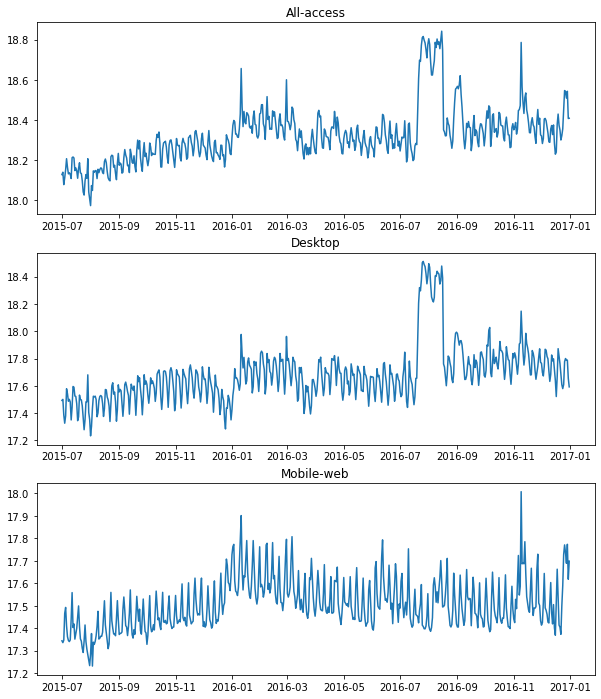

In [20]:
plt.figure(figsize=(10,12))  # Visualizing the traffic generated from each acces type
plt.subplot(3,1,1)
plt.plot(list(data_access_log.index), list(data_access_log.iloc[:, 0]), label="all-access")
plt.title("All-access")
plt.subplot(3,1,2)
plt.plot(list(data_access_log.index), list(data_access_log.iloc[:, 1]), label="desktop")
plt.title("Desktop")
plt.subplot(3,1,3)
plt.plot(list(data_access_log.index), list(data_access_log.iloc[:, 2]), label="mobile-web")
plt.title("Mobile-web")

## Analysing Data according to site

In [21]:
data.site.value_counts()  ## Unique sites present in the dataset(the first 7 refer to sites from different languages)

ja.wikipedia.org         18401
en.wikipedia.org         18297
de.wikipedia.org         16179
fr.wikipedia.org         15790
ru.wikipedia.org         13449
zh.wikipedia.org         13190
es.wikipedia.org         12799
commons.wikimedia.org     5406
www.mediawiki.org         3766
Name: site, dtype: int64

In [22]:
data_site = data.groupby(by=["site"]).sum()

In [23]:
data_site_log = np.array(data_site)
data_site_log = np.log(data_site_log) ## Taking log transform to scale the data down
data_site_log = pd.DataFrame(data_site_log, columns=data_site.columns, index = data_site.index)
data_site_log

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
site,,,,,,,,,,,,,,,,,,,,,
commons.wikimedia.org,13.933441,13.967098,13.943606,13.751534,13.859576,13.989094,14.034394,14.138822,13.995405,13.950673,...,14.244670,14.352231,14.110796,14.185527,14.281946,14.384239,14.357873,14.368364,14.369614,14.211744
de.wikipedia.org,16.398765,16.385217,16.344201,16.257896,16.408571,16.504763,16.474092,16.488657,16.450670,16.380149,...,16.489783,16.506344,16.486367,16.917977,16.876547,16.746706,16.696892,16.668381,16.621296,16.574921
en.wikipedia.org,18.251558,18.248644,18.196317,18.238601,18.271303,18.343161,18.288077,18.229782,18.253200,18.247548,...,18.443198,18.424313,18.513697,18.558126,18.681140,18.718889,18.684377,18.756496,18.565930,18.541372
es.wikipedia.org,16.541160,16.495851,16.412113,16.349053,16.432857,16.563366,16.537709,16.507723,16.488580,16.393153,...,16.321112,16.263202,16.224159,16.249372,16.526450,16.459286,16.493457,16.422799,16.175867,16.141484
fr.wikipedia.org,15.950362,15.956650,15.917562,15.984012,15.965506,16.006625,15.972589,15.954022,15.943459,15.885521,...,16.197080,16.175500,16.142780,16.216840,16.506594,16.430360,16.338868,16.302298,16.262518,16.187501
ja.wikipedia.org,16.285379,16.419070,16.317522,16.552551,16.511499,16.366700,16.335029,16.331964,16.311599,16.351126,...,16.362606,16.732540,16.594272,16.544216,16.506827,16.525666,16.526023,16.620307,16.694345,16.927240
ru.wikipedia.org,16.061590,16.078769,16.002692,15.941416,16.003808,16.078227,16.055071,16.050364,16.074422,16.210054,...,16.345912,16.342212,16.326868,16.567438,16.572709,16.445678,16.386885,16.348837,16.236489,16.344694
www.mediawiki.org,12.717653,12.816892,12.651835,12.589047,12.679938,12.835819,12.939272,12.785872,12.680482,12.857684,...,12.330571,12.873032,12.768331,12.902397,12.162230,12.203785,13.331153,12.284195,12.545177,12.441196
zh.wikipedia.org,15.236330,15.237807,15.230164,15.239579,15.304255,15.309032,15.305718,15.324561,15.319830,15.361486,...,15.327528,15.304284,15.359579,15.410202,15.418144,15.407981,15.421881,15.340018,15.345813,15.371116


In [24]:
data_site_log = data_site_log.T  ## Transforming the data to the timeseries format
data_site_log = data_site_log.reset_index()

In [25]:
data_site_log = data_site_log.rename(columns={"index" : "Date"})
data_site_log["Date"] = pd.to_datetime(data_site_log.Date, infer_datetime_format=True)
data_site_log = data_site_log.set_index("Date")

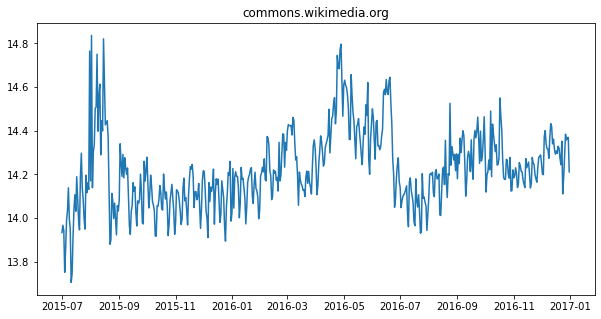

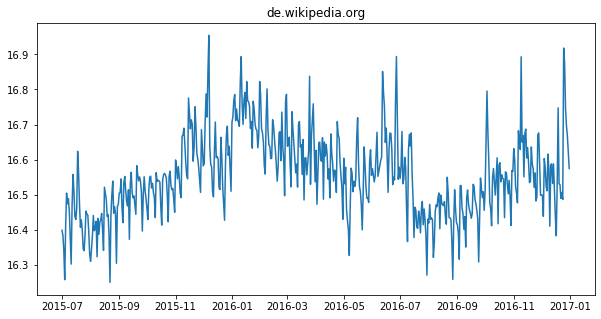

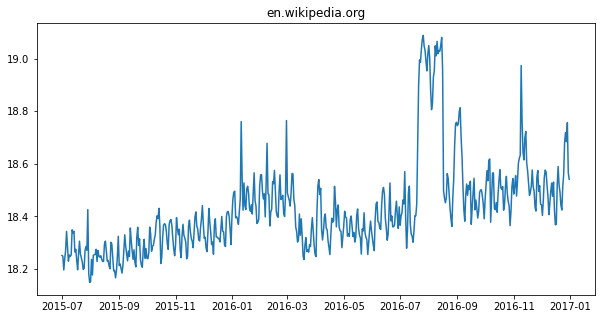

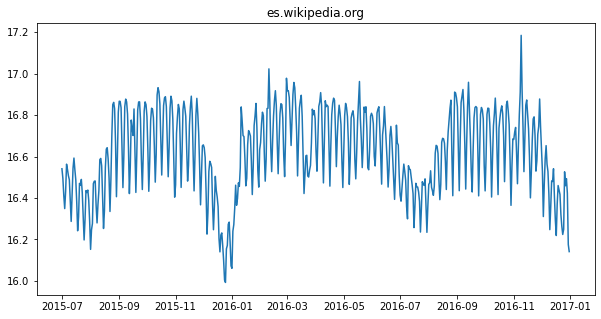

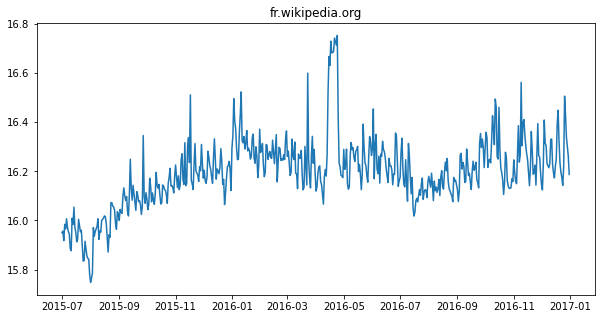

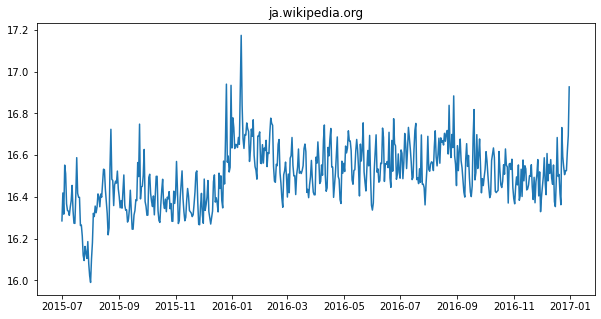

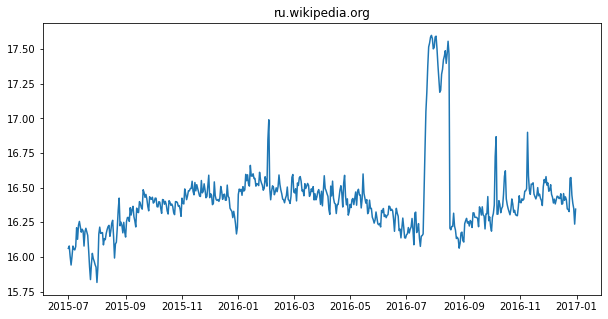

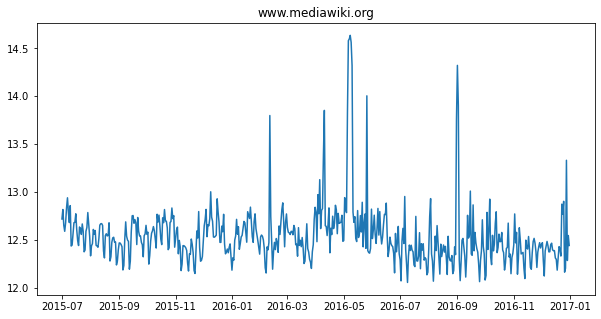

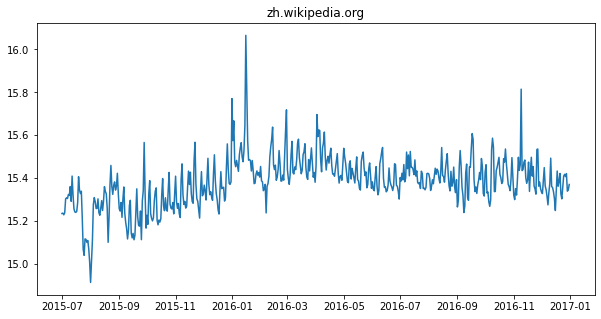

In [26]:
for i in range(9):   # Visualizing traffic from each site
    plt.figure(figsize=(10, 5))
    plt.plot(list(data_site_log.index), list(data_site_log.iloc[:, i]))
    plt.title(data_site_log.columns[i])
    plt.show()

## Predicting Traffic From different sites

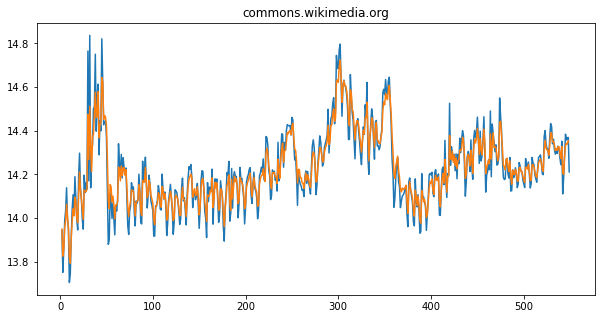

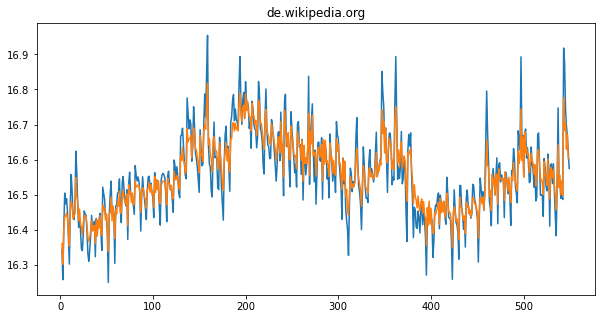

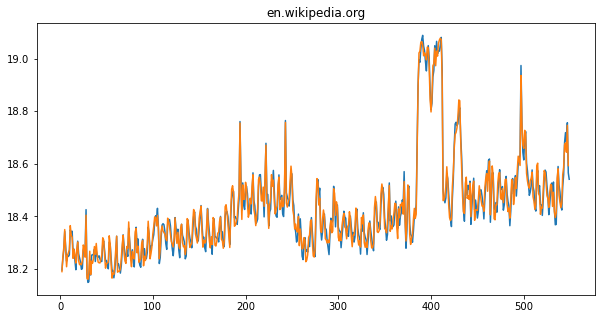

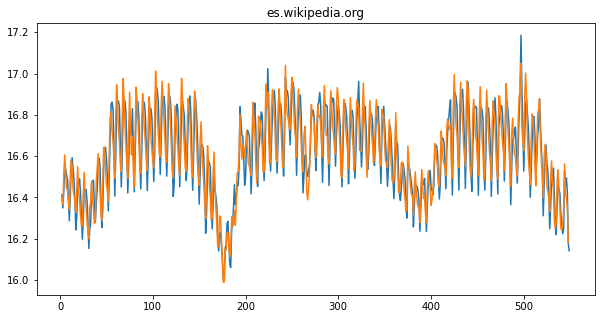

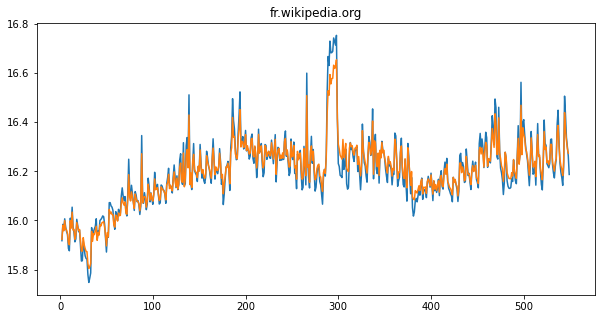

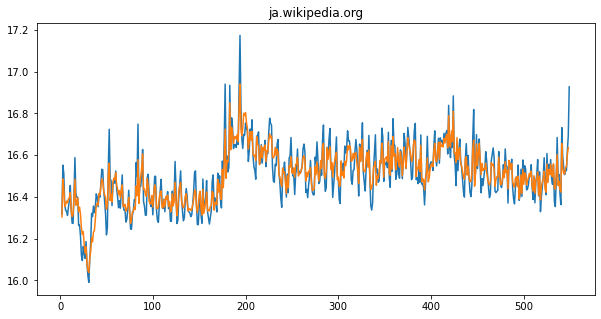

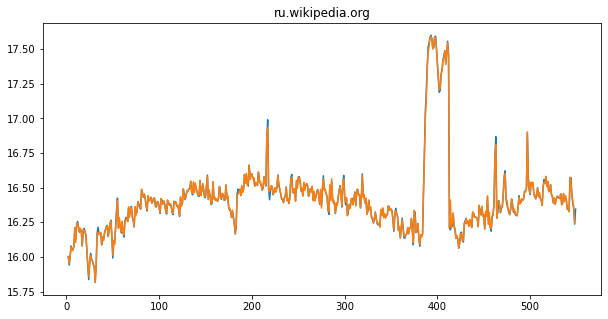

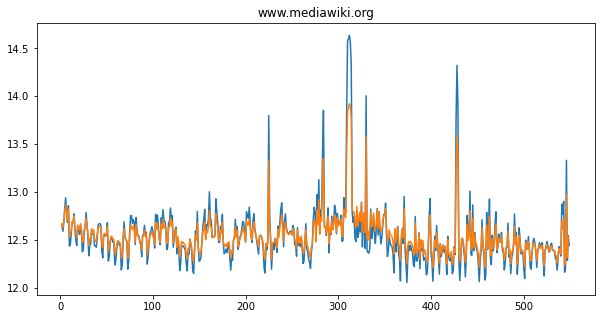

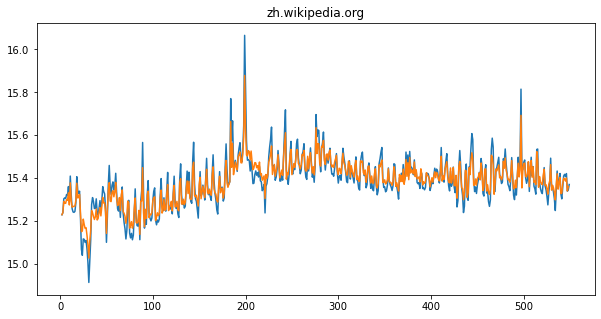

In [27]:
for i in range(9):
    req_data = np.array(data_site_log.iloc[:, i])
    arima1 = ARIMA(req_data, [2,1,2])  
    res = arima1.fit(disp=False)
    pred = res.predict(1, 549, typ = 'levels')
    x = [j for j in range(600)]
    plt.figure(figsize=(10, 5))
    plt.plot(x[2:len(data_site_log)], list(data_site_log.iloc[2:, i]))
    plt.plot(x[2:len(pred)], pred[2:])
    plt.title(data_site_log.columns[i])
    plt.show()

## Analysing top pages from each site

In [28]:
data_page_g = data.copy()
views = np.array(data_page_g.iloc[:, 4:])
views = views.sum(axis=1)  # Obtaining the total number of views considering all intervals
views

array([11966., 13966.,  2862., ..., 17421.,  8647.,  4829.])

In [29]:
data_page_g["Total_views"] = views

In [30]:
data_page_g

,Page,channel,site,access_type,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Total_views
0,2NE1_zh.wikipedia.org_all-access_spider,spider,zh.wikipedia.org,all-access,18.0,11.0,5.0,13,14,9,...,63,15,26,14,20,22,19,18,20,11966.0
1,2PM_zh.wikipedia.org_all-access_spider,spider,zh.wikipedia.org,all-access,11.0,14.0,15.0,18,11,13,...,42,28,15,9,30,52,45,26,20,13966.0
2,3C_zh.wikipedia.org_all-access_spider,spider,zh.wikipedia.org,all-access,1.0,0.0,1.0,1,0,4,...,1,1,7,4,4,6,3,4,17,2862.0
3,4minute_zh.wikipedia.org_all-access_spider,spider,zh.wikipedia.org,all-access,35.0,13.0,10.0,94,4,26,...,10,26,27,16,11,17,19,10,11,9419.0
5,5566_zh.wikipedia.org_all-access_spider,spider,zh.wikipedia.org,all-access,12.0,7.0,4.0,5,20,8,...,27,8,17,32,19,23,17,17,50,9027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144944,ChichÃ©n_ItzÃ¡_es.wikipedia.org_all-access_spider,spider,es.wikipedia.org,all-access,8.0,13.0,19.0,14,6,5,...,18,12,6,5,14,10,174,8,19,9575.0
144945,FecundaciÃ³n_es.wikipedia.org_all-access_spider,spider,es.wikipedia.org,all-access,29.0,16.0,6.0,11,33,4,...,8,13,3,6,10,16,10,7,8,9194.0
144946,Gran_Hermano_VIP_(EspaÃ±a)_es.wikipedia.org_al...,spider,es.wikipedia.org,all-access,4.0,25.0,7.0,11,6,6,...,299,46,5,11,77,523,110,171,43,17421.0
144947,Modelo_atÃ³mico_de_Thomson_es.wikipedia.org_al...,spider,es.wikipedia.org,all-access,0.0,2.0,6.0,6,7,5,...,1,5,11,9,11,6,7,9,4,8647.0


In [31]:
data_page_g = data_page_g.sort_values(by=["site", "Total_views"], ascending=False) # Sorting based on site and total views

In [32]:
sites_data = dict(data_page_g.site.value_counts())

In [33]:
sites = list(data_page_g.site.unique())
sites.sort(reverse = True)
print(sites)

['zh.wikipedia.org', 'www.mediawiki.org', 'ru.wikipedia.org', 'ja.wikipedia.org', 'fr.wikipedia.org', 'es.wikipedia.org', 'en.wikipedia.org', 'de.wikipedia.org', 'commons.wikimedia.org']


In [34]:
ind = 0  # Obtaining list of top-viewed sites from the sorted dataframe
top_sites = []
for x in range(9):
    top_sites.append(ind)
    ind = ind + sites_data[sites[x]]
data_page_g.iloc[top_sites]

,Page,channel,site,access_type,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Total_views
28727,Wikipedia:é¦é¡µ_zh.wikipedia.org_all-access_a...,all-agents,zh.wikipedia.org,all-access,220658.0,224568.0,216749.0,204914,208939,244429,...,248754,279137,285285,275789,293672,292819,297940,265810,264023,1.236943e+08
20970,MediaWiki_www.mediawiki.org_all-access_all-agents,all-agents,www.mediawiki.org,all-access,37689.0,43396.0,35257.0,34395,33295,37618,...,26888,23649,23186,25467,26699,27027,27223,27386,23761,1.710674e+07
99322,ÐÐ°Ð³Ð»Ð°Ð²Ð½Ð°Ñ_ÑÑÑÐ°Ð½Ð¸ÑÐ°_ru.wikiped...,all-agents,ru.wikipedia.org,all-access,1453303.0,1571367.0,1274754.0,1123844,1168780,1286318,...,1449036,1250886,1255119,1392328,1368744,1326434,1275855,1228566,1141299,1.086019e+09
120336,ã¡ã¤ã³ãã¼ã¸_ja.wikipedia.org_all-access...,all-agents,ja.wikipedia.org,all-access,418594.0,415069.0,419023.0,398771,394907,434303,...,612776,565656,596148,657977,577249,540661,568040,602701,499566,2.107538e+08
27330,WikipÃ©dia:Accueil_principal_fr.wikipedia.org_...,all-agents,fr.wikipedia.org,all-access,1620421.0,1621846.0,1590634.0,1808250,1546264,1611611,...,1643855,1524659,1698098,1804079,1678559,1707558,1677860,1647134,1541414,8.684807e+08
92205,Wikipedia:Portada_es.wikipedia.org_all-access_...,all-agents,es.wikipedia.org,all-access,1764612.0,1757734.0,1700245.0,1660195,1655175,1758566,...,1023047,921533,966632,1025942,1106451,1048807,1066132,978922,1045617,7.514923e+08
38573,Main_Page_en.wikipedia.org_all-access_all-agents,all-agents,en.wikipedia.org,all-access,20381245.0,20752194.0,19573967.0,20439645,20772109,22544669,...,22539246,25056620,25865746,28342885,26916991,27025053,26073819,24363967,26149541,1.206618e+10
139119,Wikipedia:Hauptseite_de.wikipedia.org_all-acce...,all-agents,de.wikipedia.org,all-access,2983623.0,2965848.0,2900702.0,2687450,2827409,3062343,...,3520937,3188722,3643490,3903606,3907598,3732014,3577128,3514084,3286214,1.603934e+09
45071,Special:Search_commons.wikimedia.org_all-acces...,all-agents,commons.wikimedia.org,all-access,113123.0,117578.0,97518.0,75542,78029,115553,...,85253,63006,60859,78877,92406,99328,95886,90630,69772,6.715064e+07


In [35]:
sites_top = data_page_g.iloc[top_sites]
sites_top.drop(['channel', 'site','access_type', 'Total_views'], axis=1, inplace=True)
sites_top = sites_top.set_index("Page")

In [36]:
sites_top = sites_top.T      # Transforming the dataset to a timeseries format
sites_top.reset_index(inplace = True)
sites_top = sites_top.rename(columns={"index":"Date"})
sites_top["Date"] = pd.to_datetime(sites_top["Date"], infer_datetime_format=True)
sites_top = sites_top.set_index("Date")
sites_top

Page,Wikipedia:é¦é¡µ_zh.wikipedia.org_all-access_all-agents,MediaWiki_www.mediawiki.org_all-access_all-agents,ÐÐ°Ð³Ð»Ð°Ð²Ð½Ð°Ñ_ÑÑÑÐ°Ð½Ð¸ÑÐ°_ru.wikipedia.org_all-access_all-agents,ã¡ã¤ã³ãã¼ã¸_ja.wikipedia.org_all-access_all-agents,WikipÃ©dia:Accueil_principal_fr.wikipedia.org_all-access_all-agents,Wikipedia:Portada_es.wikipedia.org_all-access_all-agents,Main_Page_en.wikipedia.org_all-access_all-agents,Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents,Special:Search_commons.wikimedia.org_all-access_all-agents
Date,,,,,,,,,
2015-07-01,220658.0,37689.0,1453303.0,418594.0,1620421.0,1764612.0,20381245.0,2983623.0,113123.0
2015-07-02,224568.0,43396.0,1571367.0,415069.0,1621846.0,1757734.0,20752194.0,2965848.0,117578.0
2015-07-03,216749.0,35257.0,1274754.0,419023.0,1590634.0,1700245.0,19573967.0,2900702.0,97518.0
2015-07-04,204914.0,34395.0,1123844.0,398771.0,1808250.0,1660195.0,20439645.0,2687450.0,75542.0
2015-07-05,208939.0,33295.0,1168780.0,394907.0,1546264.0,1655175.0,20772109.0,2827409.0,78029.0
...,...,...,...,...,...,...,...,...,...
2016-12-27,293672.0,26699.0,1368744.0,577249.0,1678559.0,1106451.0,26916991.0,3907598.0,92406.0
2016-12-28,292819.0,27027.0,1326434.0,540661.0,1707558.0,1048807.0,27025053.0,3732014.0,99328.0
2016-12-29,297940.0,27223.0,1275855.0,568040.0,1677860.0,1066132.0,26073819.0,3577128.0,95886.0


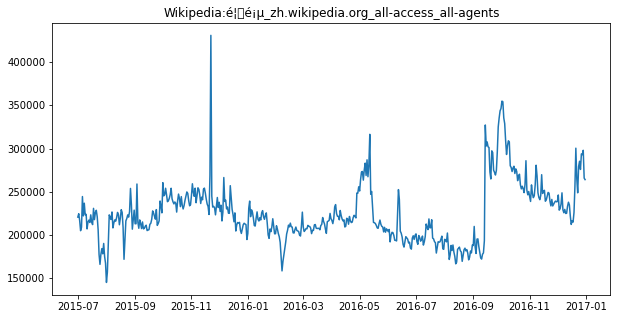

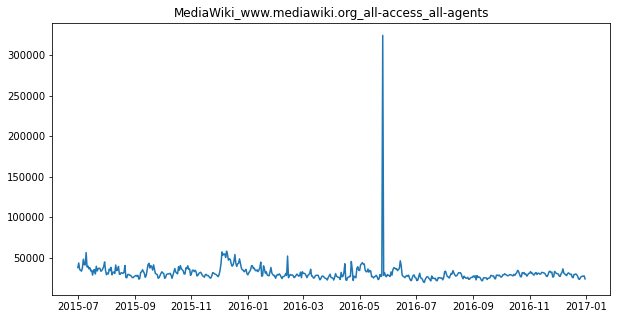

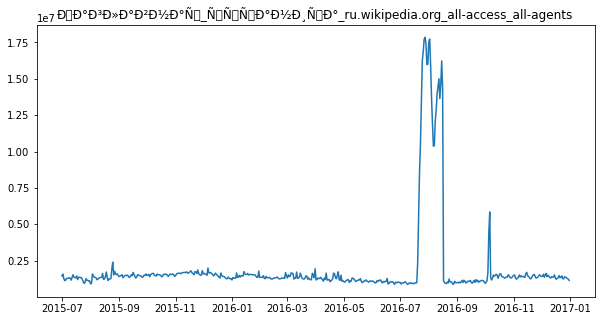

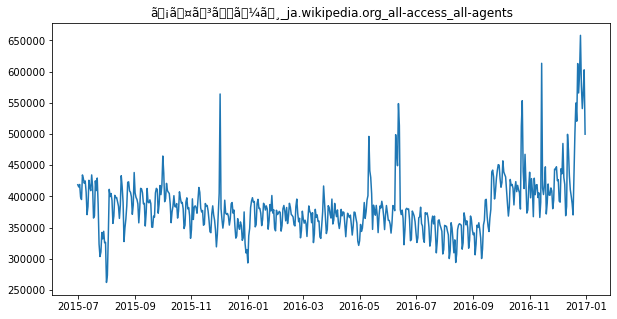

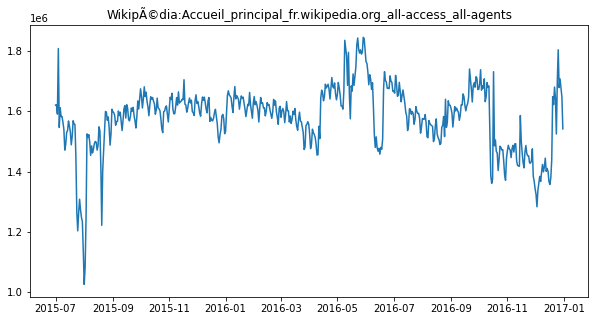

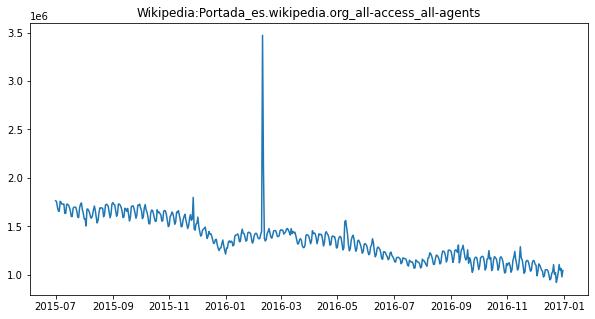

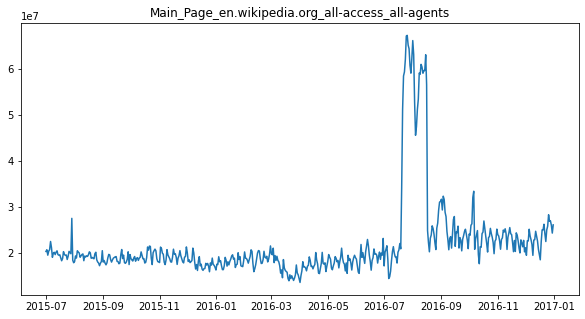

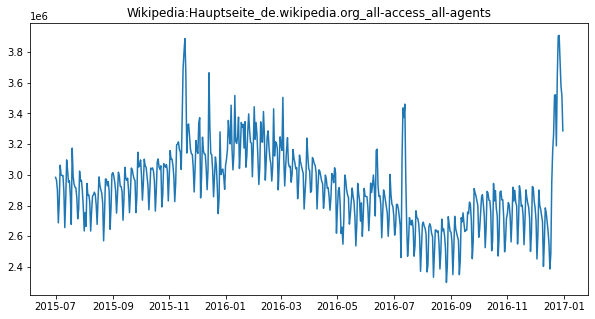

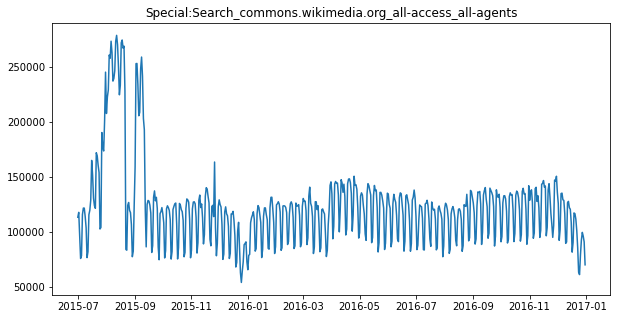

In [37]:
for i in range(9):        #Visualizing the traffic for the top-viewed pages
    plt.figure(figsize=(10, 5))
    plt.plot(list(sites_top.index), list(sites_top.iloc[:, i]))
    plt.title(sites_top.columns[i])

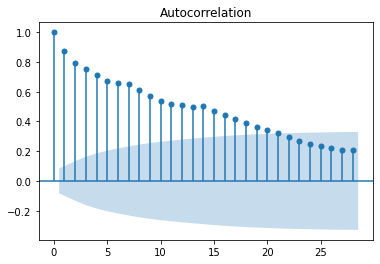

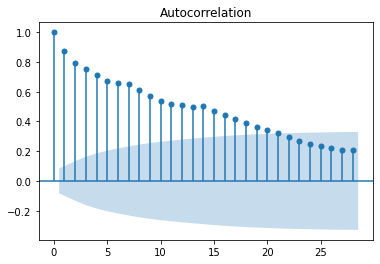

In [38]:
plot_acf(sites_top.iloc[:, 0])  # Visualising autocorrelation for one page

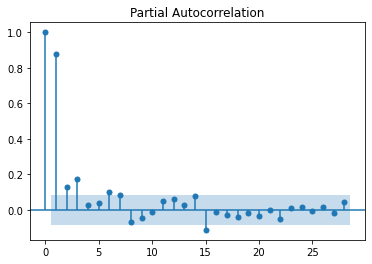

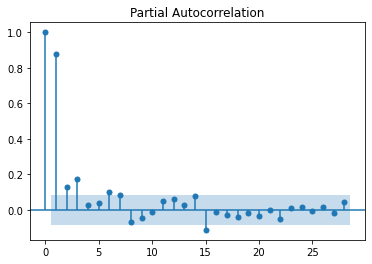

In [40]:
plot_pacf(sites_top.iloc[:, 0])  # Visualising autocorrelation for one page

## Predicting the traffic for top-viewed pages from each site

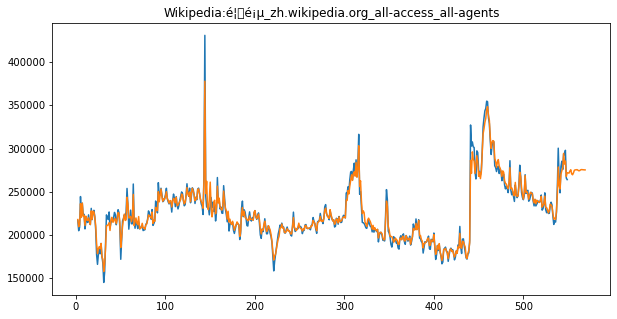

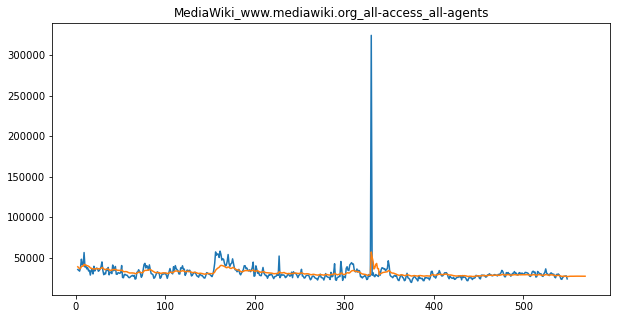

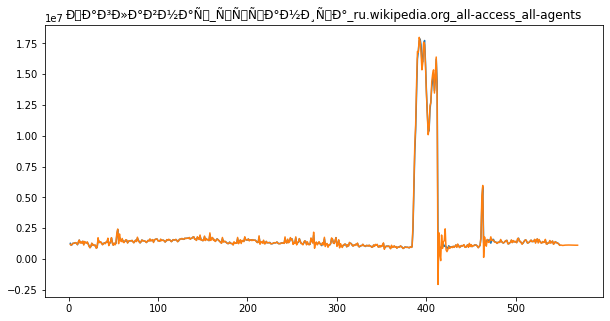

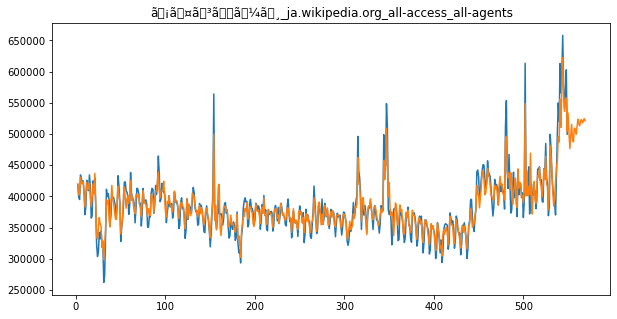

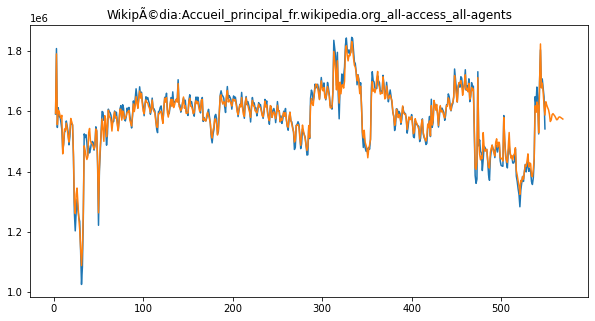

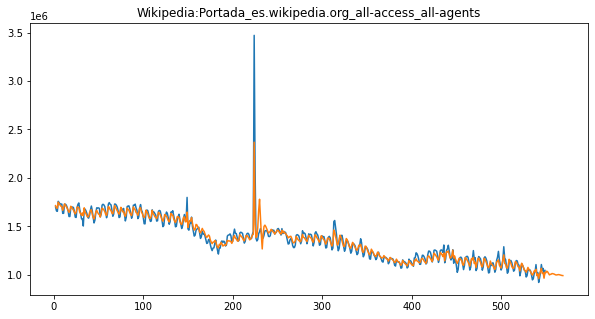

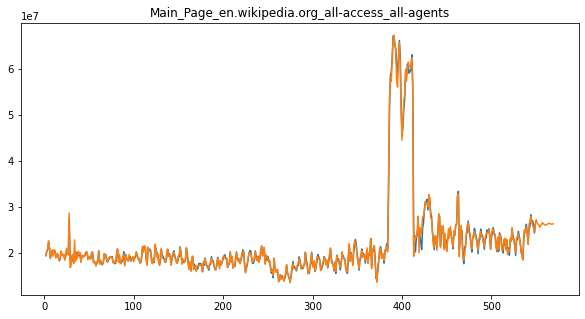

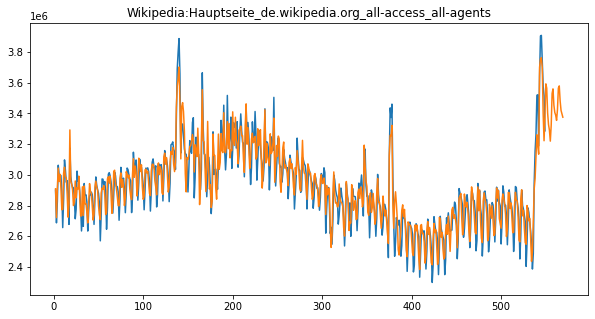

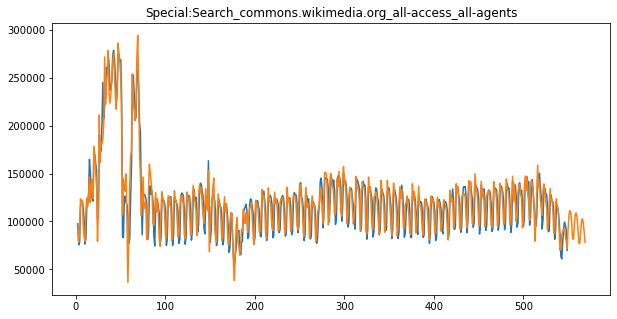

In [39]:
for i in range(9):
    req_data = np.array(sites_top.iloc[:, i])
    arima2 = ARIMA(req_data, [10,1,1])  
    res = arima2.fit(disp=False)
    preds = res.predict(1, 570, typ = 'levels')
    x = [j for j in range(600)]
    plt.figure(figsize=(10, 5))
    plt.plot(x[2:len(sites_top)], list(sites_top.iloc[2:, i]))
    plt.plot(x[2:len(preds)], preds[2:])
    plt.title(sites_top.columns[i])
    plt.show()